In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

%matplotlib inline
tf.config.set_visible_devices([], 'GPU')

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
print(len(train_df.landmark_id.unique()))
print(train_df.landmark_id.max())
print(train_df.landmark_id.min())

81313
203092
1


In [4]:
train_df.landmark_id.value_counts().loc[train_df.landmark_id.value_counts() < 1000]

149980    971
139894    966
1924      944
176528    920
9070      900
         ... 
180503      2
179834      2
183115      2
63266       2
197219      2
Name: landmark_id, Length: 81306, dtype: int64

In [5]:
print(train_df.loc[(train_df.landmark_id == 149980)].count())
print(train_df.loc[(train_df.landmark_id == 139894)].count())
print(train_df.loc[(train_df.landmark_id == 1924)].count())
print(train_df.loc[(train_df.landmark_id == 176528)].count())
print(train_df.loc[(train_df.landmark_id == 9070)].count())

id             971
landmark_id    971
dtype: int64
id             966
landmark_id    966
dtype: int64
id             944
landmark_id    944
dtype: int64
id             920
landmark_id    920
dtype: int64
id             900
landmark_id    900
dtype: int64


In [36]:
train_df.loc[train_df.landmark_id == 139894].id

1091057    000e5acba361de91
1091058    00750ba2629ccdb0
1091059    00c3f7049c308d6a
1091060    00cf1af7a2f1a940
1091061    00e20546ace5995a
                 ...       
1092018    ff44a11735e9a3cd
1092019    ff4a9abb53fd9051
1092020    ff56ab96130562ec
1092021    ff69adb1c3cef547
1092022    fffbc91a7cf038cc
Name: id, Length: 966, dtype: object

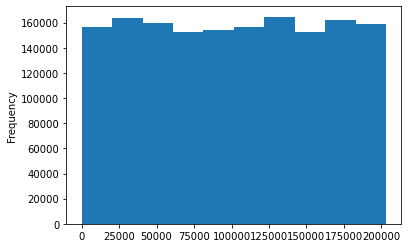

In [7]:
train_df.landmark_id.plot(kind='hist')

In [8]:
train_df.loc[train_df.id == '0000ae056149919f']

,id,landmark_id
995306,0000ae056149919f,128432


In [9]:
for filename in os.listdir('train/0/0/0'):
    print(os.path.splitext(filename)[0])

0000059611c7d079
000014b1f770f640
000015f76534add3
00001ae42cd00356
00001b2ba2c69ac5
000020dfc079c013
000022ce0b9d8966
0000341f232b1354
00003fe2469cdbf5
00004208e2bc0cc0
000054af45275b62
00005f617bc1763e
00007594d1b97325
0000ae056149919f
0000c60a968c6b92
0000c8cb9f609e7a
0000d0c3babeeffb
0000e69998d37a98
0000fb2148d6c0e4
0000fc82f5f2440a
0000ffd8771d66ef
000102e1aec36f2b
00010dc0bc0f9417
000117ac0efec994
00011ae297e4ea48
00011e1543c80df7
0001264e556fadde
0001291c85c5cee4
0001389ccab5118a
00014028389a81fc
000155148d9f0948
000171b259e48280
0001741076b61475
00017bd0410c6016
000189419c9e44e6
00018c9815dc97d5
00018d7947a2a33f
00019b859b575233
00019baa6474c394
00019f1e3920ae0c
0001a926735b74de
0001aa145a185bd5
0001ab4127e84977
0001b7ba0106b4d6
0001c405b87f8abe
0001cca2408230f5
0001cd1dc5ec2d37
0001cea5d2ae9494
0001d150ba3697f6
0001dbf4734f4eb1
0001dc06ea03b5bd
0001e062bddb9179
0001f99980a1d29a
00021006542cf5d4
00021be1ce5ab8c3
0002214e4407b9c0
0002272575ca2b45
00022c4a6a1bb331
00022df18f970b

In [10]:
def load_images_from_folder(folder, image_size=(250, 250)):
    images = []
    for filename in os.listdir(folder):
        loaded_img = load_img(os.path.join(folder,filename), target_size=image_size)
        numpy_img = img_to_array(loaded_img)
        images.append((os.path.splitext(filename)[0], numpy_img))
    return images

In [11]:
def load_image_from_file(filepath, image_size=(250, 250)):
    loaded_img = load_img(filepath, target_size=image_size)
    numpy_img = img_to_array(loaded_img)
    return (os.path.splitext(filename)[0], numpy_img)

In [12]:
input_img_dim = (250, 250, 3)
img_size = (250, 250)

In [13]:
# train_img_list = []
# train_img_data_list = []
# sample_dirs = ['0', '7', 'f']
# base_dir = 'train'
# for sub_dir_1 in sample_dirs:
#     for sub_dir_2 in sample_dirs:
#         for sub_dir_3 in sample_dirs:
#             current_dir = os.path.join(base_dir, sub_dir_1, sub_dir_2, sub_dir_3)
#             train_img_list.extend(load_images_from_folder(current_dir, image_size=img_size))

In [14]:
landmark_id_list = [149980, 139894, 1924, 176528, 9070]
train_img_list = []
base_dir = 'train'

for land_id in landmark_id_list:
    filename_list = list(train_df.loc[(train_df.landmark_id == land_id)].id)
    for filename in filename_list:
        filename = filename + '.jpg'
        filepath = os.path.join(base_dir, filename[0], filename[1], filename[2], filename)
        train_img_list.append(load_image_from_file(filepath, image_size=img_size))
    

In [15]:
train_img_df = pd.DataFrame(train_img_list, columns=['id', 'image_data'])

In [16]:
train_img_df = pd.merge(train_img_df, train_df, on='id', how='left')
train_img_df['categorized_landmark_id'] = train_img_df.landmark_id.astype('category').cat.codes

In [17]:
num_ids = len(train_img_df.categorized_landmark_id.unique())
print(num_ids)

5


In [18]:
train_img_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 4700
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       4701 non-null   object
 1   image_data               4701 non-null   object
 2   landmark_id              4701 non-null   int64 
 3   categorized_landmark_id  4701 non-null   int8  
dtypes: int64(1), int8(1), object(2)
memory usage: 151.5+ KB


In [19]:
image_data = np.array(train_img_df.image_data.to_list())
target_labels = train_img_df.categorized_landmark_id

In [20]:
image_data.shape

(4701, 250, 250, 3)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(image_data, target_labels, test_size=0.25, random_state=42)

In [22]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
sca = tf.keras.metrics.SparseCategoricalAccuracy()

base_model = tf.keras.applications.VGG19(input_shape=input_img_dim, include_top=False, weights='imagenet')
base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
dense_layer = tf.keras.layers.Dense(1000, activation='relu')
dropout_layer = tf.keras.layers.Dropout(0.3)
prediction_layer = tf.keras.layers.Dense(num_ids, activation='softmax')
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    dense_layer,
    dropout_layer,
    prediction_layer
])
model.compile(optimizer=adam, loss=scce, metrics=[sca])

In [23]:
es = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=4)

model.fit(X_train, y_train, batch_size=2, epochs=3, validation_data=(X_val, y_val), callbacks=[es], use_multiprocessing=1)
# ba = tf.keras.metrics.BinaryAccuracy()
# recall = tf.keras.metrics.Recall()
# precision = tf.keras.metrics.Precision()
# ba.update_state(y_test, model.predict(X_test))
# recall.update_state(y_test, [prediction[0] for prediction in model.predict(X_test)])
# precision.update_state(y_test, [prediction[0] for prediction in model.predict(X_test)])
# recall_result = recall.result().numpy()
# precision_result = precision.result().numpy()

# network_type = 'VGG19'
# print(network_type, '-', 'accuracy:', ba.result().numpy())
# print(network_type, '-', 'recall:', recall_result)
# print(network_type, '-', 'precision:', precision_result)
# print(network_type, '-', 'F1 score:', 2 * (precision_result * recall_result) / (precision_result + recall_result))

Train on 3525 samples, validate on 1176 samples
Epoch 1/3
3525/3525 [==============================] - 516s 146ms/sample - loss: 1.1273 - sparse_categorical_accuracy: 0.7779 - val_loss: 0.9907 - val_sparse_categorical_accuracy: 0.9218
Epoch 2/3
3525/3525 [==============================] - 535s 152ms/sample - loss: 0.9954 - sparse_categorical_accuracy: 0.9132 - val_loss: 1.0010 - val_sparse_categorical_accuracy: 0.9031
Epoch 3/3
3525/3525 [==============================] - 534s 151ms/sample - loss: 0.9780 - sparse_categorical_accuracy: 0.9282 - val_loss: 0.9708 - val_sparse_categorical_accuracy: 0.9354


In [29]:
base_dir = 'test'
test_img_list = []
for sub_dir_1 in os.listdir(base_dir):
    for sub_dir_2 in os.listdir(os.path.join(base_dir, sub_dir_1)):
        for sub_dir_3 in os.listdir(os.path.join(base_dir, sub_dir_1, sub_dir_2)):
            for filename in os.listdir(os.path.join(base_dir, sub_dir_1, sub_dir_2, sub_dir_3)):
                test_img_list.append(load_image_from_file(os.path.join(base_dir, sub_dir_1, sub_dir_2, sub_dir_3, filename), image_size=img_size))
        

In [31]:
test_img_df = pd.DataFrame(test_img_list, columns=['id', 'image_data'])
image_data = np.array(test_img_df.image_data.to_list())

In [38]:
predictions = model.predict(image_data)

In [40]:
test_img_df.iloc[0].id

'00084cdf8f600d00'

In [43]:
for index, prediction in enumerate(predictions):
    print(test_img_df.iloc[index].id, prediction)

00084cdf8f600d00 [4.0234561e-04 1.3233067e-05 2.1029959e-02 9.7855443e-01 1.8602688e-13]
00141b8a5a729084 [1.2673154e-01 8.7325597e-01 1.2453439e-06 1.1232814e-05 7.8351171e-13]
0044d82ea7654ece [2.2596840e-15 9.9999750e-01 4.5024633e-15 2.4784090e-06 8.4690034e-19]
00d5b448fa93e1b8 [2.9121053e-01 3.8241699e-02 8.1095226e-02 5.8945256e-01 1.3917592e-10]
012436be7f659057 [9.4007272e-01 1.5617341e-06 4.5393225e-02 1.4532579e-02 2.3787348e-09]
013098904123b014 [2.0284465e-15 9.9999869e-01 2.1747427e-17 1.3567683e-06 1.5563041e-28]
01b4c4975d1bebbe [3.0329905e-14 1.0000000e+00 4.3910101e-18 1.6269487e-14 7.8408304e-31]
027a19e10127d5c4 [9.9600983e-01 3.4046334e-03 3.8996486e-09 5.8553147e-04 7.3903654e-11]
0289a20454afe4d2 [3.4994358e-11 1.0000000e+00 2.7411724e-13 2.8048061e-14 5.4372943e-18]
02cb34a8dc4030da [2.2933382e-07 9.9999976e-01 1.5924146e-08 1.4946750e-11 6.6251633e-18]
03182100f70cf0cf [8.3513591e-08 9.9788648e-01 1.6184275e-10 2.1133728e-03 2.1208828e-15]
031e0db4ab66a433 [4.5

 1.82223334e-06]
8982b9bdab72d897 [2.2943358e-09 9.9973661e-01 1.7743027e-12 2.6343239e-04 5.4065430e-16]
89b12ae28e5f957a [9.2044844e-11 9.9998510e-01 4.0980766e-10 1.4943540e-05 1.4148314e-18]
8a0feffc4c713c1d [3.7715753e-04 9.9464250e-01 2.0009824e-05 4.9576187e-03 2.6201460e-06]
8a356fb5eaefde38 [5.0905128e-06 4.1212263e-03 2.4392155e-05 9.9584514e-01 4.1844869e-06]
8a6a3543c32b330f [9.3974769e-01 7.9378850e-08 2.7299462e-02 3.2799955e-02 1.5280546e-04]
8a788531719fc203 [6.4699128e-03 9.8665875e-01 1.3796215e-04 6.7333928e-03 4.7996922e-09]
8a904083522d361f [9.9924350e-01 6.8672830e-06 7.0652954e-04 5.5146288e-06 3.7675552e-05]
8a90ac4414662b6b [4.0893388e-05 9.9976319e-01 1.5704288e-06 1.9434681e-04 1.4913011e-10]
8aa2113ec3d3ad95 [1.3107620e-02 9.8689240e-01 1.6747360e-09 2.7636043e-11 1.5444125e-15]
8ae8d34a66bd1860 [3.2389915e-12 1.0000000e+00 5.4209207e-15 5.3763046e-11 1.3216088e-24]
8b755a10f8985ed2 [1.4939303e-11 8.3080137e-01 3.3406575e-09 1.6919866e-01 3.8995916e-18]
8b98